<a href="https://colab.research.google.com/github/noushadkhan01/tensorflow/blob/master/classification/bank_customers_calssification_for_exiting_the_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
files.upload()

In [2]:
!ls

cleaned_test.csv   kaggle.json	     sample_data
cleaned_train.csv  Machine-Learning  submission_epochs100.csv


In [3]:
!git clone https://github.com/noushadkhan01/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 30 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [4]:
!ls

cleaned_test.csv   kaggle.json	     sample_data	       tensorflow
cleaned_train.csv  Machine-Learning  submission_epochs100.csv


In [5]:
df = pd.read_csv('tensorflow/classification/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## check for null values

In [9]:
df.isnull().sum().sort_values(ascending = False)[:2]

Exited             0
EstimatedSalary    0
dtype: int64

**^^as u can see there is no null value**

In [10]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [11]:
np.log1p(df.Age).skew()

0.20336041516983316

## import important dependencies

In [0]:
import tensorflow as tf
from tensorflow import keras

In [13]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [14]:
df = df.iloc[:, 3:]
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [15]:
df = pd.get_dummies(df, drop_first = True)
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [16]:
X = df.drop('Exited', 1)
y = df.Exited
X.shape, y.shape

((10000, 11), (10000,))

## StandardScaler

We need to scale out data before applying to neural network becuase of speed

In [0]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

In [43]:
columns = X_train.columns
columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [41]:
X_train.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7681,641,33,2,146193.6,2,1,1,55796.83,0,0,1


In [42]:
X_test.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:1], X_test[:1]

(array([[-0.09792126, -0.55759842, -1.03635146,  1.13249447,  0.81039385,
          0.64198477,  0.96683535, -0.76862426, -0.56987189, -0.5731713 ,
          0.92295821]]),
 array([[-0.55032881, -0.36597914,  1.0436811 ,  0.89172052, -0.92971564,
          0.64198477,  0.96683535,  1.61245299,  1.75478035, -0.5731713 ,
         -1.08347268]]))

In [47]:
y_train = y_train.values
y_test = y_test.values
y_train[:2], y_test[:2]

(array([1, 0]), array([0, 1]))

# Make ANN

In [0]:
from tensorflow import keras

## import Sequential from keras
**it is required to initialize our neural network model**

### Step 1:- create ann model by sequential

In [49]:
#1 first initialize our keras model by Sequential
model = keras.models.Sequential()
model

### Step 2:- Add dense layer

if a data is linenarly separable then their is no need to add hidden layer or don't even need a neural networks by convention

**Tip:-- ** no. of nodes in hidden layers is the average of no. of nodes in input layers and no. of node in output layer

In [50]:
ninput = 11 #no of independent variables
noutput = 1 #output is either 1 or either 0 so no of hidden layers in output is 1
nhidden = (ninput + noutput) / 2
nhidden

6.0

In [0]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu, input_dim = 11))

In [52]:
model

### add 2nd layer

In [53]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu))
model

### Step 3:- add output layer

**there are two types of activation function for output of categorical varibles **
- 1**softmax**, which is used when dependent varible have more than two categorical variables
- 2 **sigmoid** , which is used when dependent varable have 2 categorical variables

In [0]:
model.add(keras.layers.Dense(units = 1, activation = tf.nn.sigmoid))

In [55]:
model

## Step 4:-- compile the model
apply stochastic gradient descent method

In [56]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model

### Step 5:-- fit the model

batch_size = no. of observation afterwhich u want to update the weights

In [57]:
model.fit(X_train, y_train, batch_size = 10 , epochs = 100, class_weight = 'balance')

Epoch 1/100
7000/7000 [==============================] - 1s 172us/step - loss: 0.5721 - acc: 0.7309
Epoch 2/100
7000/7000 [==============================] - 1s 119us/step - loss: 0.4604 - acc: 0.8000
Epoch 3/100
7000/7000 [==============================] - 1s 116us/step - loss: 0.4365 - acc: 0.8054
Epoch 4/100
7000/7000 [==============================] - 1s 119us/step - loss: 0.4264 - acc: 0.8086
Epoch 5/100
7000/7000 [==============================] - 1s 118us/step - loss: 0.4194 - acc: 0.8134
Epoch 6/100
7000/7000 [==============================] - 1s 117us/step - loss: 0.4105 - acc: 0.8177
Epoch 7/100
7000/7000 [==============================] - 1s 113us/step - loss: 0.3994 - acc: 0.8259
Epoch 8/100
7000/7000 [==============================] - 1s 113us/step - loss: 0.3860 - acc: 0.8327
Epoch 9/100
7000/7000 [==============================] - 1s 115us/step - loss: 0.3759 - acc: 0.8393
Epoch 10/100
7000/7000 [==============================] - 1s 115us/step - loss: 0.3688 - acc: 0.8426

### Step 7:- make predictions

In [58]:
y_pred = model.predict(X_test)
y_pred[:2]

array([[0.25947544],
       [0.33895501]], dtype=float32)

In [59]:
y_pred.max()

0.99999976

In [60]:
y_pred.min()

0.0019692387

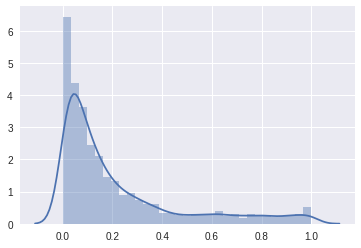

In [61]:
sns.distplot(y_pred)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [63]:
f_ypred = np.array([1 if i > .5 else 0 for i in y_pred])
print(f'predicted binary\'s first three values are {f_ypred[:3]} \n')
c = confusion_matrix(y_test, f_ypred)
print(f'confusion matrix is\n\n {c} \n\n')
print(f'Precision score is :- {precision_score(y_test, f_ypred)}')
print(f'Recall score is :- {recall_score(y_test, f_ypred)}')

print(f'Classification report is \n\n{classification_report(y_test, f_ypred)}')

predicted binary's first three values are [0 0 0] 

confusion matrix is

 [[2265  114]
 [ 311  310]] 


Precision score is :- 0.7311320754716981
Recall score is :- 0.499194847020934
Classification report is 

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      2379
          1       0.73      0.50      0.59       621

avg / total       0.85      0.86      0.85      3000



Homework Instruction



Use our ANN model to predict if the customer with the following informations will leave the bank: 

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $50000


In [44]:
columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [64]:
user = np.array([[600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]])
user

array([[  600,    40,     3, 60000,     2,     1,     1, 50000,     0,
            0,     1]])

**We need to scale that user becuase our model has been trained on scaled data**

In [65]:
user = sc.transform(user)
user

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.51948284,  0.11306906, -0.68967937, -0.24256538,  0.81039385,
         0.64198477,  0.96683535, -0.86933284, -0.56987189, -0.5731713 ,
         0.92295821]])

In [66]:
user_result = model.predict(user)
user_result

array([[0.03466043]], dtype=float32)

In [67]:
user_result = model.predict_classes(user)
user_result

array([[0]], dtype=int32)

**^^as u can see this user will not leave the bank**

# Cross_val_score
**on deep learning models**

**Tricky thing**:- here we build our model with keras but the K-fold cross_validation is a scikit-Learn's function
so wee need to combine **Keras** and **Scikit-Learn**
so perfect module for this is **KerasWrapper** it will wrap k_fold_cross validation by **sicikit-learn** into **keras** model
so in another words we will be able to include k-fold cross validationn into our keras classifier
   

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
import tensorflow as tf
from tensorflow import keras
def keras_classifier():
  model = keras.models.Sequential([
      keras.layers.Dense(6, activation = tf.nn.relu, input_dim = 11),
      keras.layers.Dense(6, activation = tf.nn.relu),
      keras.layers.Dense(1, activation = tf.nn.sigmoid)    
  ])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [86]:
classifier = KerasClassifier(build_fn = keras_classifier,batch_size = 10, epochs = 100)
classifier

## cross_val_score

In [87]:
X = df.drop('Exited', 1)
y = df.Exited
X.shape, y.shape

((10000, 11), (10000,))

In [88]:
X.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [90]:
X = StandardScaler().fit_transform(X)
y = y.values
X[0], y[0]

(array([-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.64609167,  0.97024255,  0.02188649, -0.57873591, -0.57380915,
        -1.09598752]), 1)

In [95]:
accuracies = cross_val_score(classifier, X, y, cv = 10, verbose = 5)

[CV]  ................................................................
Epoch 1/100
9000/9000 [==============================] - 2s 222us/step - loss: 0.5799 - acc: 0.7288
Epoch 2/100
9000/9000 [==============================] - 1s 133us/step - loss: 0.4411 - acc: 0.8080
Epoch 3/100
9000/9000 [==============================] - 1s 134us/step - loss: 0.4174 - acc: 0.8229
Epoch 4/100
9000/9000 [==============================] - 1s 134us/step - loss: 0.4090 - acc: 0.8214
Epoch 5/100
9000/9000 [==============================] - 1s 135us/step - loss: 0.4017 - acc: 0.8240
Epoch 6/100
9000/9000 [==============================] - 1s 135us/step - loss: 0.3929 - acc: 0.8251
Epoch 7/100
9000/9000 [==============================] - 1s 134us/step - loss: 0.3844 - acc: 0.8261
Epoch 8/100
9000/9000 [==============================] - 1s 138us/step - loss: 0.3770 - acc: 0.8298
Epoch 9/100
9000/9000 [==============================] - 1s 134us/step - loss: 0.3711 - acc: 0.8320
Epoch 10/100
9000/9000 [=====

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


Epoch 1/100
9000/9000 [==============================] - 2s 246us/step - loss: 0.5250 - acc: 0.7732
Epoch 2/100
9000/9000 [==============================] - 1s 140us/step - loss: 0.4348 - acc: 0.7977
Epoch 3/100
9000/9000 [==============================] - 1s 143us/step - loss: 0.4092 - acc: 0.8133
Epoch 4/100
9000/9000 [==============================] - 1s 140us/step - loss: 0.3876 - acc: 0.8348
Epoch 5/100
9000/9000 [==============================] - 1s 140us/step - loss: 0.3733 - acc: 0.8419
Epoch 6/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.3653 - acc: 0.8431
Epoch 7/100
9000/9000 [==============================] - 1s 140us/step - loss: 0.3597 - acc: 0.8516
Epoch 8/100
9000/9000 [==============================] - 1s 141us/step - loss: 0.3551 - acc: 0.8564
Epoch 9/100
9000/9000 [==============================] - 1s 139us/step - loss: 0.3509 - acc: 0.8557
Epoch 10/100
9000/9000 [==============================] - 1s 140us/step - loss: 0.3469 - acc: 0.8610

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.3min remaining:    0.0s


Epoch 1/100
9000/9000 [==============================] - 2s 253us/step - loss: 0.4921 - acc: 0.7602
Epoch 2/100
9000/9000 [==============================] - 1s 143us/step - loss: 0.4297 - acc: 0.8083
Epoch 3/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.4221 - acc: 0.8150
Epoch 4/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.4165 - acc: 0.8206
Epoch 5/100
9000/9000 [==============================] - 1s 146us/step - loss: 0.4107 - acc: 0.8267
Epoch 6/100
9000/9000 [==============================] - 1s 146us/step - loss: 0.4015 - acc: 0.8322
Epoch 7/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.3827 - acc: 0.8419
Epoch 8/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.3644 - acc: 0.8499
Epoch 9/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.3534 - acc: 0.8537
Epoch 10/100
9000/9000 [==============================] - 1s 144us/step - loss: 0.3478 - acc: 0.8582

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.5min remaining:    0.0s


Epoch 1/100
9000/9000 [==============================] - 2s 265us/step - loss: 0.5478 - acc: 0.7336
Epoch 2/100
9000/9000 [==============================] - 1s 146us/step - loss: 0.4228 - acc: 0.8239
Epoch 3/100
9000/9000 [==============================] - 1s 148us/step - loss: 0.3960 - acc: 0.8379
Epoch 4/100
9000/9000 [==============================] - 1s 146us/step - loss: 0.3740 - acc: 0.8503
Epoch 5/100
9000/9000 [==============================] - 1s 147us/step - loss: 0.3606 - acc: 0.8549
Epoch 6/100
9000/9000 [==============================] - 1s 150us/step - loss: 0.3534 - acc: 0.8563
Epoch 7/100
9000/9000 [==============================] - 1s 146us/step - loss: 0.3484 - acc: 0.8600
Epoch 8/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.3457 - acc: 0.8592
Epoch 9/100
9000/9000 [==============================] - 1s 148us/step - loss: 0.3429 - acc: 0.8599
Epoch 10/100
9000/9000 [==============================] - 1s 145us/step - loss: 0.3418 - acc: 0.8611

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.7min remaining:    0.0s


Epoch 1/100
9000/9000 [==============================] - 3s 307us/step - loss: 0.4932 - acc: 0.7931
Epoch 2/100
9000/9000 [==============================] - 2s 185us/step - loss: 0.4275 - acc: 0.8104
Epoch 3/100
9000/9000 [==============================] - 2s 183us/step - loss: 0.4116 - acc: 0.8231
Epoch 4/100
9000/9000 [==============================] - 2s 180us/step - loss: 0.4016 - acc: 0.8280
Epoch 5/100
9000/9000 [==============================] - 2s 181us/step - loss: 0.3938 - acc: 0.8316
Epoch 6/100
9000/9000 [==============================] - 2s 179us/step - loss: 0.3882 - acc: 0.8309
Epoch 7/100
9000/9000 [==============================] - 1s 165us/step - loss: 0.3811 - acc: 0.8343
Epoch 8/100
9000/9000 [==============================] - 1s 165us/step - loss: 0.3743 - acc: 0.8436
Epoch 9/100
9000/9000 [==============================] - 1s 167us/step - loss: 0.3645 - acc: 0.8494
Epoch 10/100
9000/9000 [==============================] - 1s 165us/step - loss: 0.3557 - acc: 0.8540

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.8min finished


In [97]:
print(f'Accuracies are \n {accuracies}\n')
print(f'Mean accuracy is {accuracies.mean()}')
print(f'variance in accuracies is {accuracies.std()}')

Accuracies are 
 [0.863      0.853      0.86599999 0.85999999 0.86299999 0.85
 0.86399999 0.88399999 0.852      0.86499999]

Mean accuracy is 0.8619999946355821
variance in accuracies is 0.009186945728528486


# GridSearchCV

**Target accuracy = 90.0**

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
import tensorflow as tf
from tensorflow import keras
def keras_classifier(optimizer, layer1, layer2):
  model = keras.models.Sequential([
      keras.layers.Dense(layer1, activation = tf.nn.relu, input_dim = 11),
      keras.layers.Dense(layer2, activation = tf.nn.relu),
      keras.layers.Dense(1, activation = tf.nn.sigmoid)    
  ])
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [111]:
classifier = KerasClassifier(build_fn = keras_classifier)
classifier

In [0]:
param_grid = {'batch_size': [5, 10, 25],
              'epochs': [100, 200, 500],
              'optimizer':['adam', 'rmsprop'],
              'layer1': [6, 9, 12],
              'layer2':[6, 9, 12],
              }

In [112]:
grid = GridSearchCV(classifier, param_grid = param_grid, cv = 7, verbose = 10,scoring = 'accuracy')
grid

GridSearchCV(cv=7, error_score='raise',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f133ac3e198>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'batch_size': [5, 10, 25], 'epochs': [100, 200, 500], 'optimizer': ['adam', 'rmsprop'], 'layer1': [6, 9, 12], 'layer2': [6, 9, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [0]:
grid.fit(X, y)

Fitting 7 folds for each of 162 candidates, totalling 1134 fits
[CV] batch_size=5, epochs=100, layer1=6, layer2=6, optimizer=adam ....
Epoch 1/100
8571/8571 [==============================] - 5s 541us/step - loss: 0.4798 - acc: 0.7891
Epoch 2/100
8571/8571 [==============================] - 3s 358us/step - loss: 0.4213 - acc: 0.8208
Epoch 3/100
8571/8571 [==============================] - 3s 362us/step - loss: 0.4127 - acc: 0.8257
Epoch 4/100
8571/8571 [==============================] - 3s 361us/step - loss: 0.4020 - acc: 0.8325
Epoch 5/100
8571/8571 [==============================] - 3s 360us/step - loss: 0.3841 - acc: 0.8403
Epoch 6/100
8571/8571 [==============================] - 3s 361us/step - loss: 0.3656 - acc: 0.8497
Epoch 7/100
8571/8571 [==============================] - 3s 357us/step - loss: 0.3535 - acc: 0.8542
Epoch 8/100
8571/8571 [==============================] - 3s 361us/step - loss: 0.3474 - acc: 0.8594
Epoch 9/100
8571/8571 [==============================] - 3s 364us

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s


Epoch 1/100
8571/8571 [==============================] - 5s 558us/step - loss: 0.5026 - acc: 0.7688
Epoch 2/100
8571/8571 [==============================] - 3s 374us/step - loss: 0.4272 - acc: 0.8145
Epoch 3/100
8571/8571 [==============================] - 3s 372us/step - loss: 0.4062 - acc: 0.8295
Epoch 4/100
8571/8571 [==============================] - 3s 375us/step - loss: 0.3804 - acc: 0.8465
Epoch 5/100
8571/8571 [==============================] - 3s 370us/step - loss: 0.3654 - acc: 0.8524
Epoch 6/100
8571/8571 [==============================] - 3s 375us/step - loss: 0.3584 - acc: 0.8514
Epoch 7/100
8571/8571 [==============================] - 3s 372us/step - loss: 0.3543 - acc: 0.8531
Epoch 8/100
8571/8571 [==============================] - 3s 378us/step - loss: 0.3511 - acc: 0.8570
Epoch 9/100
8571/8571 [==============================] - 3s 377us/step - loss: 0.3484 - acc: 0.8575
Epoch 10/100
8571/8571 [==============================] - 3s 383us/step - loss: 0.3481 - acc: 0.8591

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.7min remaining:    0.0s


Epoch 1/100
8571/8571 [==============================] - 5s 577us/step - loss: 0.4944 - acc: 0.7898
Epoch 2/100
8571/8571 [==============================] - 3s 378us/step - loss: 0.4280 - acc: 0.8106
Epoch 3/100
8571/8571 [==============================] - 3s 381us/step - loss: 0.4042 - acc: 0.8266
Epoch 4/100
8571/8571 [==============================] - 3s 385us/step - loss: 0.3757 - acc: 0.8453
Epoch 5/100
8571/8571 [==============================] - 3s 385us/step - loss: 0.3573 - acc: 0.8530
Epoch 6/100
8571/8571 [==============================] - 3s 378us/step - loss: 0.3505 - acc: 0.8554
Epoch 7/100
8571/8571 [==============================] - 3s 379us/step - loss: 0.3472 - acc: 0.8561
Epoch 8/100
8571/8571 [==============================] - 4s 412us/step - loss: 0.3461 - acc: 0.8556
Epoch 9/100
8571/8571 [==============================] - 4s 425us/step - loss: 0.3454 - acc: 0.8579
Epoch 10/100
8571/8571 [==============================] - 4s 446us/step - loss: 0.3449 - acc: 0.8547

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 16.2min remaining:    0.0s


Epoch 1/100
8571/8571 [==============================] - 5s 616us/step - loss: 0.4809 - acc: 0.7922
Epoch 2/100
8571/8571 [==============================] - 3s 393us/step - loss: 0.4328 - acc: 0.8144
Epoch 3/100
8571/8571 [==============================] - 4s 459us/step - loss: 0.4236 - acc: 0.8246
Epoch 4/100
8571/8571 [==============================] - 4s 460us/step - loss: 0.4159 - acc: 0.8304
Epoch 5/100
8571/8571 [==============================] - 4s 430us/step - loss: 0.4088 - acc: 0.8344
Epoch 6/100
8571/8571 [==============================] - 3s 389us/step - loss: 0.4030 - acc: 0.8358
Epoch 7/100
8571/8571 [==============================] - 3s 395us/step - loss: 0.4000 - acc: 0.8368
Epoch 8/100
8571/8571 [==============================] - 3s 395us/step - loss: 0.3950 - acc: 0.8368
Epoch 9/100
8571/8571 [==============================] - 3s 394us/step - loss: 0.3859 - acc: 0.8414
Epoch 10/100
8571/8571 [==============================] - 3s 396us/step - loss: 0.3694 - acc: 0.8508

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 22.0min remaining:    0.0s


Epoch 1/100
8572/8572 [==============================] - 5s 626us/step - loss: 0.4906 - acc: 0.7914
Epoch 2/100
8572/8572 [==============================] - 3s 408us/step - loss: 0.4296 - acc: 0.8109
Epoch 3/100
8572/8572 [==============================] - 4s 412us/step - loss: 0.4132 - acc: 0.8262
Epoch 4/100
8572/8572 [==============================] - 4s 412us/step - loss: 0.3961 - acc: 0.8341
Epoch 5/100
8572/8572 [==============================] - 4s 416us/step - loss: 0.3813 - acc: 0.8409
Epoch 6/100
8572/8572 [==============================] - 4s 416us/step - loss: 0.3691 - acc: 0.8503
Epoch 7/100
8572/8572 [==============================] - 4s 413us/step - loss: 0.3617 - acc: 0.8507
Epoch 8/100
8572/8572 [==============================] - 4s 411us/step - loss: 0.3559 - acc: 0.8553
Epoch 9/100
8572/8572 [==============================] - 4s 409us/step - loss: 0.3518 - acc: 0.8531
Epoch 10/100
8572/8572 [==============================] - 4s 414us/step - loss: 0.3483 - acc: 0.8585

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 28.0min remaining:    0.0s


Epoch 1/100
8572/8572 [==============================] - 6s 664us/step - loss: 0.4890 - acc: 0.7981
Epoch 2/100
8572/8572 [==============================] - 4s 439us/step - loss: 0.4361 - acc: 0.7981
Epoch 3/100
8572/8572 [==============================] - 4s 437us/step - loss: 0.4270 - acc: 0.7981
Epoch 4/100
8572/8572 [==============================] - 4s 434us/step - loss: 0.4222 - acc: 0.7981
Epoch 5/100
8572/8572 [==============================] - 4s 442us/step - loss: 0.4179 - acc: 0.8013
Epoch 6/100
8572/8572 [==============================] - 4s 432us/step - loss: 0.4117 - acc: 0.8221
Epoch 7/100
8572/8572 [==============================] - 4s 436us/step - loss: 0.4066 - acc: 0.8301
Epoch 8/100
8572/8572 [==============================] - 4s 427us/step - loss: 0.4025 - acc: 0.8342
Epoch 9/100
8572/8572 [==============================] - 4s 430us/step - loss: 0.3984 - acc: 0.8356
Epoch 10/100
8572/8572 [==============================] - 4s 427us/step - loss: 0.3955 - acc: 0.8380

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 34.2min remaining:    0.0s


Epoch 1/100
8572/8572 [==============================] - 6s 671us/step - loss: 0.4771 - acc: 0.7929
Epoch 2/100
8572/8572 [==============================] - 4s 435us/step - loss: 0.4277 - acc: 0.8090
Epoch 3/100
8572/8572 [==============================] - 4s 431us/step - loss: 0.3982 - acc: 0.8306
Epoch 4/100
8572/8572 [==============================] - 4s 436us/step - loss: 0.3712 - acc: 0.8488
Epoch 5/100
8572/8572 [==============================] - 4s 435us/step - loss: 0.3593 - acc: 0.8525
Epoch 6/100
8572/8572 [==============================] - 4s 435us/step - loss: 0.3541 - acc: 0.8560
Epoch 7/100
8572/8572 [==============================] - 4s 435us/step - loss: 0.3512 - acc: 0.8583
Epoch 8/100
8572/8572 [==============================] - 4s 436us/step - loss: 0.3488 - acc: 0.8566
Epoch 9/100
8572/8572 [==============================] - 4s 442us/step - loss: 0.3464 - acc: 0.8591
Epoch 10/100
8572/8572 [==============================] - 4s 450us/step - loss: 0.3465 - acc: 0.8605

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 40.6min remaining:    0.0s


Epoch 1/100
8571/8571 [==============================] - 5s 636us/step - loss: 0.4819 - acc: 0.7948
Epoch 2/100
8571/8571 [==============================] - 4s 412us/step - loss: 0.4336 - acc: 0.7999
Epoch 3/100
8571/8571 [==============================] - 3s 406us/step - loss: 0.4082 - acc: 0.8138
Epoch 4/100
8571/8571 [==============================] - 4s 415us/step - loss: 0.3874 - acc: 0.8294
Epoch 5/100
8571/8571 [==============================] - 4s 412us/step - loss: 0.3738 - acc: 0.8455
Epoch 6/100
8571/8571 [==============================] - 4s 415us/step - loss: 0.3639 - acc: 0.8507
Epoch 7/100
8571/8571 [==============================] - 4s 419us/step - loss: 0.3576 - acc: 0.8544
Epoch 8/100
8571/8571 [==============================] - 4s 411us/step - loss: 0.3542 - acc: 0.8586
Epoch 9/100
8571/8571 [==============================] - 4s 415us/step - loss: 0.3512 - acc: 0.8613
Epoch 10/100
8571/8571 [==============================] - 4s 412us/step - loss: 0.3489 - acc: 0.8621

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 46.6min remaining:    0.0s


Epoch 1/100
8571/8571 [==============================] - 6s 663us/step - loss: 0.4882 - acc: 0.7840
Epoch 2/100
8571/8571 [==============================] - 4s 433us/step - loss: 0.4336 - acc: 0.7979
Epoch 3/100
8571/8571 [==============================] - 4s 451us/step - loss: 0.4104 - acc: 0.8145
Epoch 4/100
8571/8571 [==============================] - 4s 420us/step - loss: 0.3833 - acc: 0.8396
Epoch 5/100
8571/8571 [==============================] - 4s 430us/step - loss: 0.3645 - acc: 0.8514
Epoch 6/100
8571/8571 [==============================] - 4s 425us/step - loss: 0.3550 - acc: 0.8557
Epoch 7/100
8571/8571 [==============================] - 4s 421us/step - loss: 0.3487 - acc: 0.8567
Epoch 8/100
8571/8571 [==============================] - 4s 422us/step - loss: 0.3460 - acc: 0.8594
Epoch 9/100
8571/8571 [==============================] - 4s 419us/step - loss: 0.3443 - acc: 0.8596
Epoch 10/100
8571/8571 [==============================] - 4s 418us/step - loss: 0.3432 - acc: 0.8609

In [0]:
best_param = grid.best_params_
best_param

In [0]:
accuracy = grid.best_score_
accuracy

In [0]:
best_model = grid.best_estimator_
best_model